<a href="https://colab.research.google.com/github/DangTienManh/AI-24-02-23-/blob/main/AI24022023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


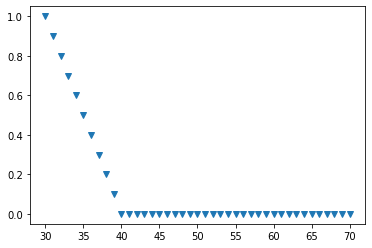

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,71,1)
slow = fuzz.trimf(x,[30,30,40])
plt.figure()
plt.plot(x,slow,'v',linewidth=1.5,label='SLOW')


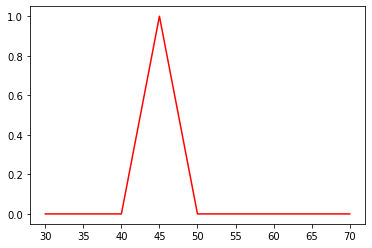

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,71,1)
medium = fuzz.trimf(x,[40,45,50])
plt.figure()
plt.plot(x,medium,'r',linewidth=1.5,label='medium')


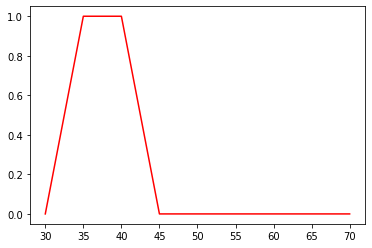

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,71,1)
medium = fuzz.trapmf(x,[30,35,40,45])
plt.figure()
plt.plot(x,medium,'r',linewidth=1.5,label='medium')


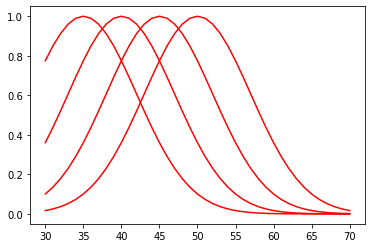

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,71,1)

slow= fuzz.gaussmf(x,35,7)
medium= fuzz.gaussmf(x,40,7)
mediumfast= fuzz.gaussmf(x,45,7)
fullspeed= fuzz.gaussmf(x,50,7)

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'r',linewidth=1.5,label='medium')
plt.plot(x,mediumfast,'r',linewidth=1.5,label='mediumfast')
plt.plot(x,fullspeed,'r',linewidth=1.5,label='fullspeed')

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']= fuzz.trimf(service.universe,[0,5,10])
service['good']= fuzz.trimf(service.universe,[5,10,10])

tip['less']= fuzz.trimf(tip.universe,[10,10,20])
tip['normal']= fuzz.trimf(tip.universe,[10,20,30])
tip['much']= fuzz.trimf(tip.universe,[20,20,30])

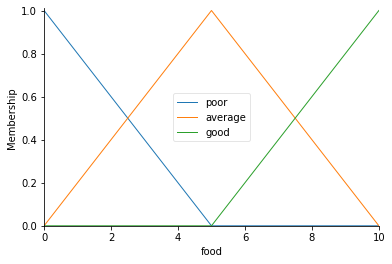

In [ ]:
food.view()

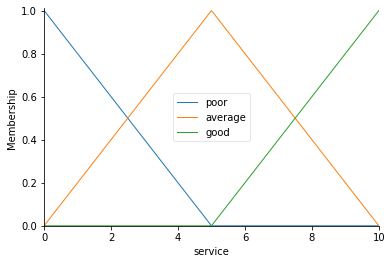

In [ ]:
service.view()

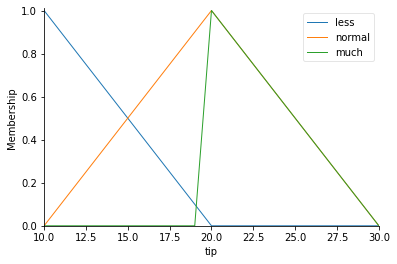

In [ ]:
tip.view()

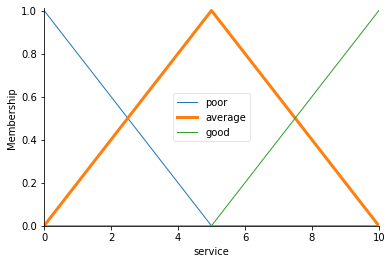

In [ ]:
service['average'].view()

In [ ]:
rule1= ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2= ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3= ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule4= ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5= ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6= ctrl.Rule(food['average']&service['good'],tip['normal'])
rule7= ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8= ctrl.Rule(food['good']&service['average'],tip['normal'])
rule9= ctrl.Rule(food['good']&service['good'],tip['much'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

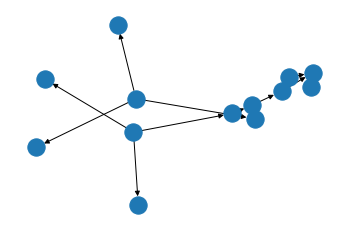

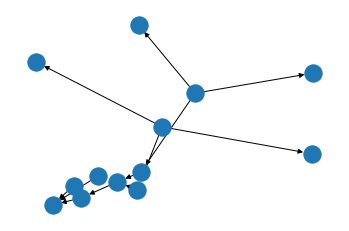

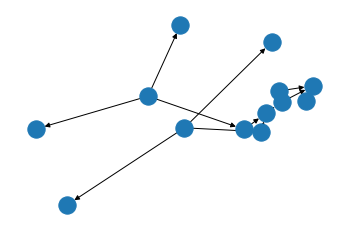

In [ ]:
rule1.view()
rule2.view()
rule3.view()

20.3290893015031


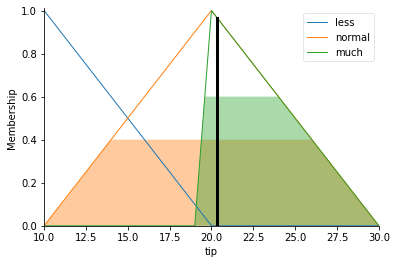

In [ ]:
tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

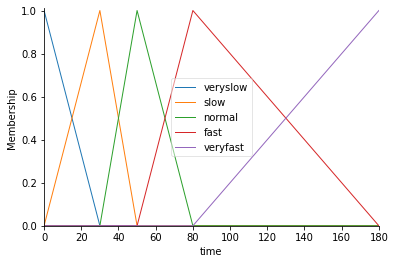

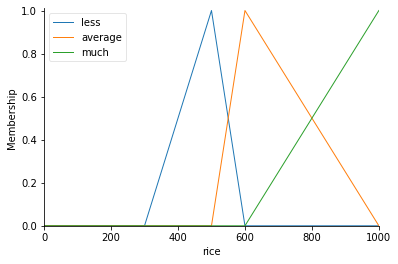

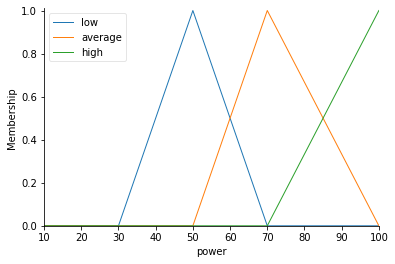

In [ ]:


import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(0,181,1),'time')
rice = ctrl.Antecedent(np.arange(0,1001,1),'rice')
power = ctrl.Consequent(np.arange(10,101,1),'power')

time['veryslow']= fuzz.trimf(time.universe,[0,0,30])
time['slow']= fuzz.trimf(time.universe,[0,30,50])
time['normal']= fuzz.trimf(time.universe,[30,50,80])
time['fast']= fuzz.trimf(time.universe,[50,80,180])
time['veryfast']= fuzz.trimf(time.universe,[80,180,180])

rice['less']= fuzz.trimf(rice.universe,[300,500,600])
rice['average']= fuzz.trimf(rice.universe,[500,600,1000])
rice['much']= fuzz.trimf(rice.universe,[600,1000,1000])

power['low']= fuzz.trimf(power.universe,[30,50,70])
power['average']= fuzz.trimf(power.universe,[50,70,100])
power['high']= fuzz.trimf(power.universe,[70,100,100])
time.view()
rice.view()
power.view()

rule1= ctrl.Rule(time['veryslow']&rice['less'],power['low'])
rule2= ctrl.Rule(time['veryslow']&rice['average'],power['average'])
rule3= ctrl.Rule(time['veryslow']&rice['much'],power['average'])
rule4= ctrl.Rule(time['slow']&rice['less'],power['low'])
rule5= ctrl.Rule(time['slow']&rice['average'],power['average'])
rule6= ctrl.Rule(time['slow']&rice['much'],power['average'])
rule7= ctrl.Rule(time['normal']&rice['less'],power['low'])
rule8= ctrl.Rule(time['normal']&rice['average'],power['average'])
rule9= ctrl.Rule(time['normal']&rice['much'],power['high'])
rule10= ctrl.Rule(time['fast']&rice['less'],power['average'])
rule11= ctrl.Rule(time['fast']&rice['average'],power['high'])
rule12= ctrl.Rule(time['fast']&rice['much'],power['high'])
rule13= ctrl.Rule(time['veryfast']&rice['less'],power['average'])
rule14= ctrl.Rule(time['veryfast']&rice['average'],power['high'])
rule15= ctrl.Rule(time['veryfast']&rice['much'],power['high'])





(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

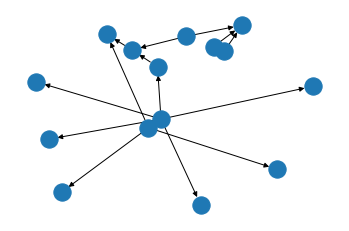

In [ ]:
rule1.view()

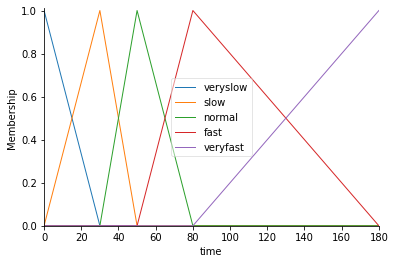

In [ ]:
time.view()

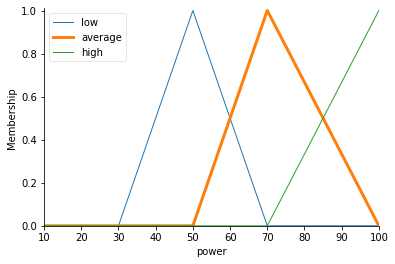

In [ ]:
power['average'].view()

49.99999999999999


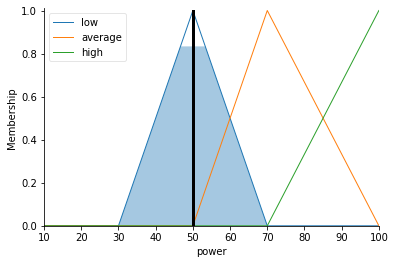

In [ ]:
cpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
cpower = ctrl.ControlSystemSimulation(cpower_ctrl)
cpower.input['time']=25
cpower.input['rice']=500
cpower.compute()
print(cpower.output['power'])
power.view(sim= cpower)